## Assignment 3 - Dimensionality Reduction
### Miguel Morales

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

In [1]:
# Library imports for the assignment
# - For question 1 -
import pandas as pd
import numpy as np
# - For question 2 -
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import time
# - For question 3 -
from sklearn.decomposition import PCA
# - For question 4 -
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Questions (15 points total)

__Question 1 (1 point).__ Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [2]:
# Analyzing the MNIST dataset (from the description on the Wikipedia page), and looking into its structure, we can determine the following:
# Columns:
# - Index column (unnamed): Row numbers 0-69,999
# - label column: The target variable (y): it contains the actual digit (0-9) that each image represents
# - 784 pixel columns: Named as 1x1, 1x2, 1x3, ..., 28x28
# -- These represent pixel intensity values from a 28×28 grayscale image (28*28 = 784)
# -- Each pixel value ranges from 0 (black) to 255 (white)
# -- The naming convention rowXcolumn indicates the position in the 28×28 grid

# Loading the MNIST dataset
mnist = pd.read_csv('../data/mnist_dataset.csv', index_col=0)

# Separate features (X) and labels (y)
X = mnist.drop('label', axis=1)
y = mnist['label']

# Splitting into training (first 60,000) and test (remaining 10,000) sets

# Training set: first 60,000 samples
X_train = X[:60000]
y_train = y[:60000]
# Test set: remaining 10,000 samples
X_test = X[60000:]
y_test = y[60000:]

# Displaying the shapes to verify the split
print(f"Training set (X_train): {X_train.shape[0]} samples")
print(f"Test set (X_test): {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Labels in training set (the digits 0-9): {y_train.unique()}")


Training set (X_train): 60000 samples
Test set (X_test): 10000 samples
Number of features: 784
Labels in training set (the digits 0-9): [2 5 8 0 4 6 7 1 9 3]


__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [3]:
# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Training process (& timing the training process)
# To time the training process I will use the time module to capture the start and end times
print("Training Random Forest classifier on full dataset...")
## Starting the timer
start_time = time.time()
## Running the training
rf_classifier.fit(X_train, y_train)
## Ending time and calculating training time
training_time = time.time() - start_time

print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Set Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Displaying detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training Random Forest classifier on full dataset...
Training completed in 3.48 seconds (0.06 minutes)

Test Set Accuracy: 0.9702 (97.02%)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       959
           1       0.99      0.99      0.99      1155
           2       0.97      0.97      0.97      1007
           3       0.96      0.95      0.95      1039
           4       0.97      0.97      0.97       925
           5       0.97      0.97      0.97       921
           6       0.98      0.99      0.98       972
           7       0.97      0.97      0.97      1048
           8       0.95      0.96      0.95       953
           9       0.96      0.95      0.95      1021

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Training completed in 3.48 seconds (0.06 minutes)

Test Set Accuracy: 0.9702 (

In [4]:
# Note: I ran the previous cell multiple times to see an average of training time
# The training times varied between approximately 2.95 sec to 3.10 sec

__Question 3 (4 points).__ Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [5]:
# Using PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%
print("Applying PCA with 95 percent explained variance:")

# Initializing PCA with 95 percent explained variance
pca = PCA(n_components=0.95, random_state=42)

# Fitting PCA on training data and transform both training and test sets
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Display the results
print(f"\nOriginal number of features: {X_train.shape[1]}")
print(f"Reduced number of features: {X_train_pca.shape[1]}")
print(f"Actual explained variance: {pca.explained_variance_ratio_.sum():.4f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")
print(f"Dimensionality reduction: {X_train.shape[1]} → {X_train_pca.shape[1]} features")
print(f"Reduction ratio: {(1 - X_train_pca.shape[1]/X_train.shape[1])*100:.2f}%")


Applying PCA with 95 percent explained variance:

Original number of features: 784
Reduced number of features: 154
Actual explained variance: 0.9504 (95.04%)
Dimensionality reduction: 784 → 154 features
Reduction ratio: 80.36%

Original number of features: 784
Reduced number of features: 154
Actual explained variance: 0.9504 (95.04%)
Dimensionality reduction: 784 → 154 features
Reduction ratio: 80.36%


In [6]:
# After the PCA, we can conclude the following:
# - Original features: 784 (28×28 pixels)
# - Reduced features: 154 components (about 80% reduction)
# - Variance: 95.04% 
#   (This means that PCA was able to compress the data from 784 dimensions down to just 154 dimensions while still retaining 95% of 
#   the information in the original dataset.)

In [7]:
# Training a new Random Forest classifier on the reduced dataset and seeing how long it takes

# Initializing a new Random Forest classifier for PCA-reduced data
rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Training and Timing the process on the PCA-reduced dataset
print("Training Random Forest classifier on PCA-reduced dataset:")
# Starting the timer
start_time_pca = time.time()
# Running the training
rf_classifier_pca.fit(X_train_pca, y_train)
# Ending time and calculating training time
training_time_pca = time.time() - start_time_pca

print(f"Training completed in {training_time_pca:.2f} seconds ({training_time_pca/60:.2f} minutes)")

Training Random Forest classifier on PCA-reduced dataset:
Training completed in 9.64 seconds (0.16 minutes)
Training completed in 9.64 seconds (0.16 minutes)


In [8]:
# Comparing the training times:
# We could observe that the PCA-reduced dataset actually took longer to train. 
# It actually took about 3 times longer:
# ~9 seconds for the PCA-reduced dataset vs ~3 seconds for the original dataset

# I was expecting the PCA-reduced dataset to train faster due to the reduced number of features, but as discussed in the course,
# Random Forests are already quite efficient with high-dimensional data and can sometimes be less efficient with lower-dimensional data 
# due to the way they construct decision trees.
# However in a data science context, PCA can still be very useful for understanding data structure and correlations among features.

In [9]:
# Evaluate the classifier on the test set: how does it compare to the previous classifier?

# Making predictions on the PCA-reduced test set
y_pred_pca = rf_classifier_pca.predict(X_test_pca)

# Evaluating the PCA model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"PCA-reduced model Test Set Accuracy: {accuracy_pca:.4f} ({accuracy_pca*100:.2f}%)")

# Displaying classification report for PCA model
print("\nClassification Report (PCA-reduced model):")
print(classification_report(y_test, y_pred_pca))

# Comparing both models
print(f"\n{'-----------------------------------------------'}")
print("Comparing both models:")
print(f"{'-----------------------------------------------'}")
print(f"Original dataset (784 features):")
print(f"  - Training time: {training_time:.2f} seconds")
print(f"  - Test accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print(f"\nPCA-reduced dataset (154 features):")
print(f"  - Training time: {training_time_pca:.2f} seconds")
print(f"  - Test accuracy: {accuracy_pca:.4f} ({accuracy_pca*100:.2f}%)")

print(f"\nDifferences:")
print(f"  - Training time difference: {training_time_pca - training_time:+.2f} seconds")
print(f"  - Accuracy difference: {accuracy_pca - accuracy:+.4f} ({(accuracy_pca - accuracy)*100:+.2f}%)")
print(f"{'-----------------------------------------------'}")

PCA-reduced model Test Set Accuracy: 0.9506 (95.06%)

Classification Report (PCA-reduced model):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       959
           1       0.98      0.99      0.98      1155
           2       0.94      0.95      0.95      1007
           3       0.92      0.93      0.93      1039
           4       0.94      0.96      0.95       925
           5       0.94      0.94      0.94       921
           6       0.97      0.98      0.97       972
           7       0.95      0.96      0.95      1048
           8       0.93      0.92      0.92       953
           9       0.95      0.91      0.93      1021

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000


-----------------------------------------------
Comparing both models:
-----------------------------------------------
Original dataset (784 fe

In [10]:
# THe PCA-reduced model has a slightly lower accuracy compared to the original model (~97% vs ~95%),
# but it provides a significant reduction in the number of features (from 784 to 154).
# As mentioned in the section above, the ramdom forest did take longer to train on the PCA-reduced dataset.

__Question 4 (4 points).__ Use t-SNE to reduce the MNIST dataset, show result graphically.

Applying t-SNE
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.007s...


c:\Users\miguel.morales\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 6000 samples in 0.709s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 550.738585
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 550.738585
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.043976
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.043976
[t-SNE] KL divergence after 1000 iterations: 1.630546

t-SNE completed in 28.11 seconds (0.47 minutes)
Reduced from 784 dimensions 

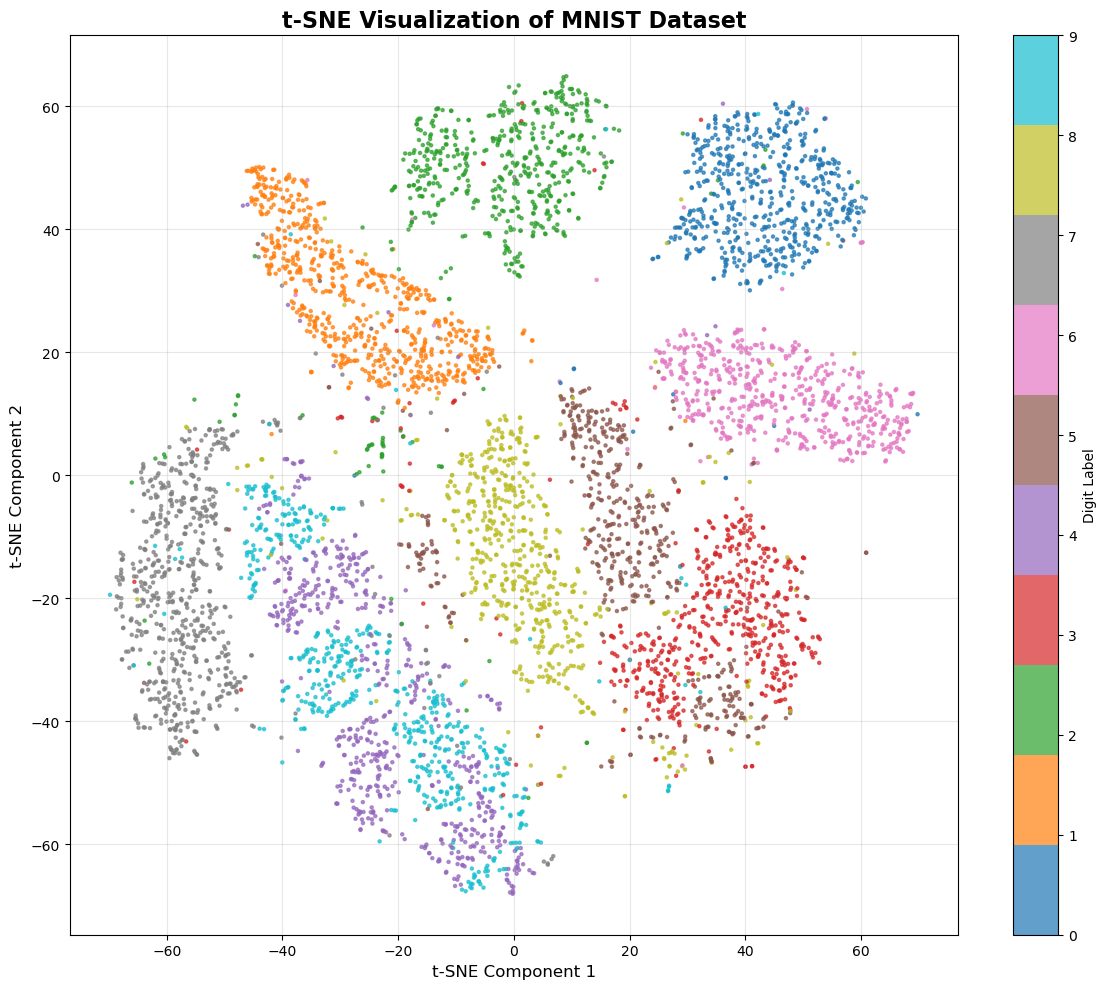


The t-SNE visualization shows how well the different digit classes are separated in 2D space.
Clusters represent different digits, with similar digits appearing closer together.


In [11]:
# Since t-SNE is computationally expensive (I tried with the entire 60,000 samples and it was too long).
# # So we could use a subset (e.g. 6000) of the data for visualization
n_samples = 6000
X_subset = X_train[:n_samples]
y_subset = y_train[:n_samples]

print(f"Applying t-SNE")

# Apply t-SNE to reduce to 2 dimensions for visualization
# Using perplexity=30 and n_iter=1000 as commonly used parameters
start_time = time.time()
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)

# If using subset:
X_tsne = tsne.fit_transform(X_subset)

tsne_time = time.time() - start_time

print(f"\nt-SNE completed in {tsne_time:.2f} seconds ({tsne_time/60:.2f} minutes)")
print(f"Reduced from {X_subset.shape[1]} dimensions to {X_tsne.shape[1]} dimensions")

# Create a scatter plot colored by digit labels
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                     c=y_subset, 
                     cmap='tab10', 
                     s=5, 
                     alpha=0.7)

plt.colorbar(scatter, label='Digit Label')
plt.title('t-SNE Visualization of MNIST Dataset', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nThe t-SNE visualization shows how well the different digit classes are separated in 2D space.")
print("Clusters represent different digits, with similar digits appearing closer together.")


__Question 5 (4 points).__ Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

In [15]:
from sklearn.manifold import LocallyLinearEmbedding, MDS

# Similar to the previous section, I will use a subset of the data for comparison
# because LLE and MDS can also be computationally expensive.

n_samples_comparison = 2000
X_subset_comparison = X_train[:n_samples_comparison]
y_subset_comparison = y_train[:n_samples_comparison]

print(f"Comparing dimensionality reduction methods on {n_samples_comparison} samples\n")

# ============================================================
# 1. Locally Linear Embedding (LLE)
# ============================================================
print("1. Applying Locally Linear Embedding (LLE):")
start_time_lle = time.time()
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_lle = lle.fit_transform(X_subset_comparison)
lle_time = time.time() - start_time_lle
print("LLE completed in: ")
print(f"   {lle_time:.2f} seconds" )


Comparing dimensionality reduction methods on 2000 samples

1. Applying Locally Linear Embedding (LLE):
LLE completed in: 
   1.22 seconds


In [16]:
# ============================================================
# 2. Multidimensional Scaling (MDS)
# ============================================================
print("\n2. Applying Multidimensional Scaling (MDS):")
start_time_mds = time.time()
mds = MDS(n_components=2, random_state=42, max_iter=300, n_init=1)
X_mds = mds.fit_transform(X_subset_comparison)
mds_time = time.time() - start_time_mds
print("MDS completed in: ")
print(f"   {mds_time:.2f} seconds" )



2. Applying Multidimensional Scaling (MDS):
MDS completed in: 
   20.48 seconds


In [17]:
# ============================================================
# 3. Apply t-SNE on the same subset for comparison
# ============================================================
print("\n3. Applying t-SNE on comparison subset:")
start_time_tsne_comp = time.time()
tsne_comp = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne_comp = tsne_comp.fit_transform(X_subset_comparison)
tsne_comp_time = time.time() - start_time_tsne_comp
print("t-SNE completed in: ")
print(f"   {tsne_comp_time:.2f} seconds" )




3. Applying t-SNE on comparison subset:
t-SNE completed in: 
   7.42 seconds


In [18]:
# ============================================================
# 4. Apply PCA on the same subset for comparison
# ============================================================
print("\n4. Applying PCA on comparison subset:")
start_time_pca_comp = time.time()
pca_comp = PCA(n_components=2, random_state=42)
X_pca_comp = pca_comp.fit_transform(X_subset_comparison)
pca_comp_time = time.time() - start_time_pca_comp
print("PCA completed in: ")
print(f"   {pca_comp_time:.2f} seconds")
print(f"   PCA explained variance: {pca_comp.explained_variance_ratio_.sum():.4f}")


4. Applying PCA on comparison subset:
PCA completed in: 
   0.03 seconds
   PCA explained variance: 0.1681


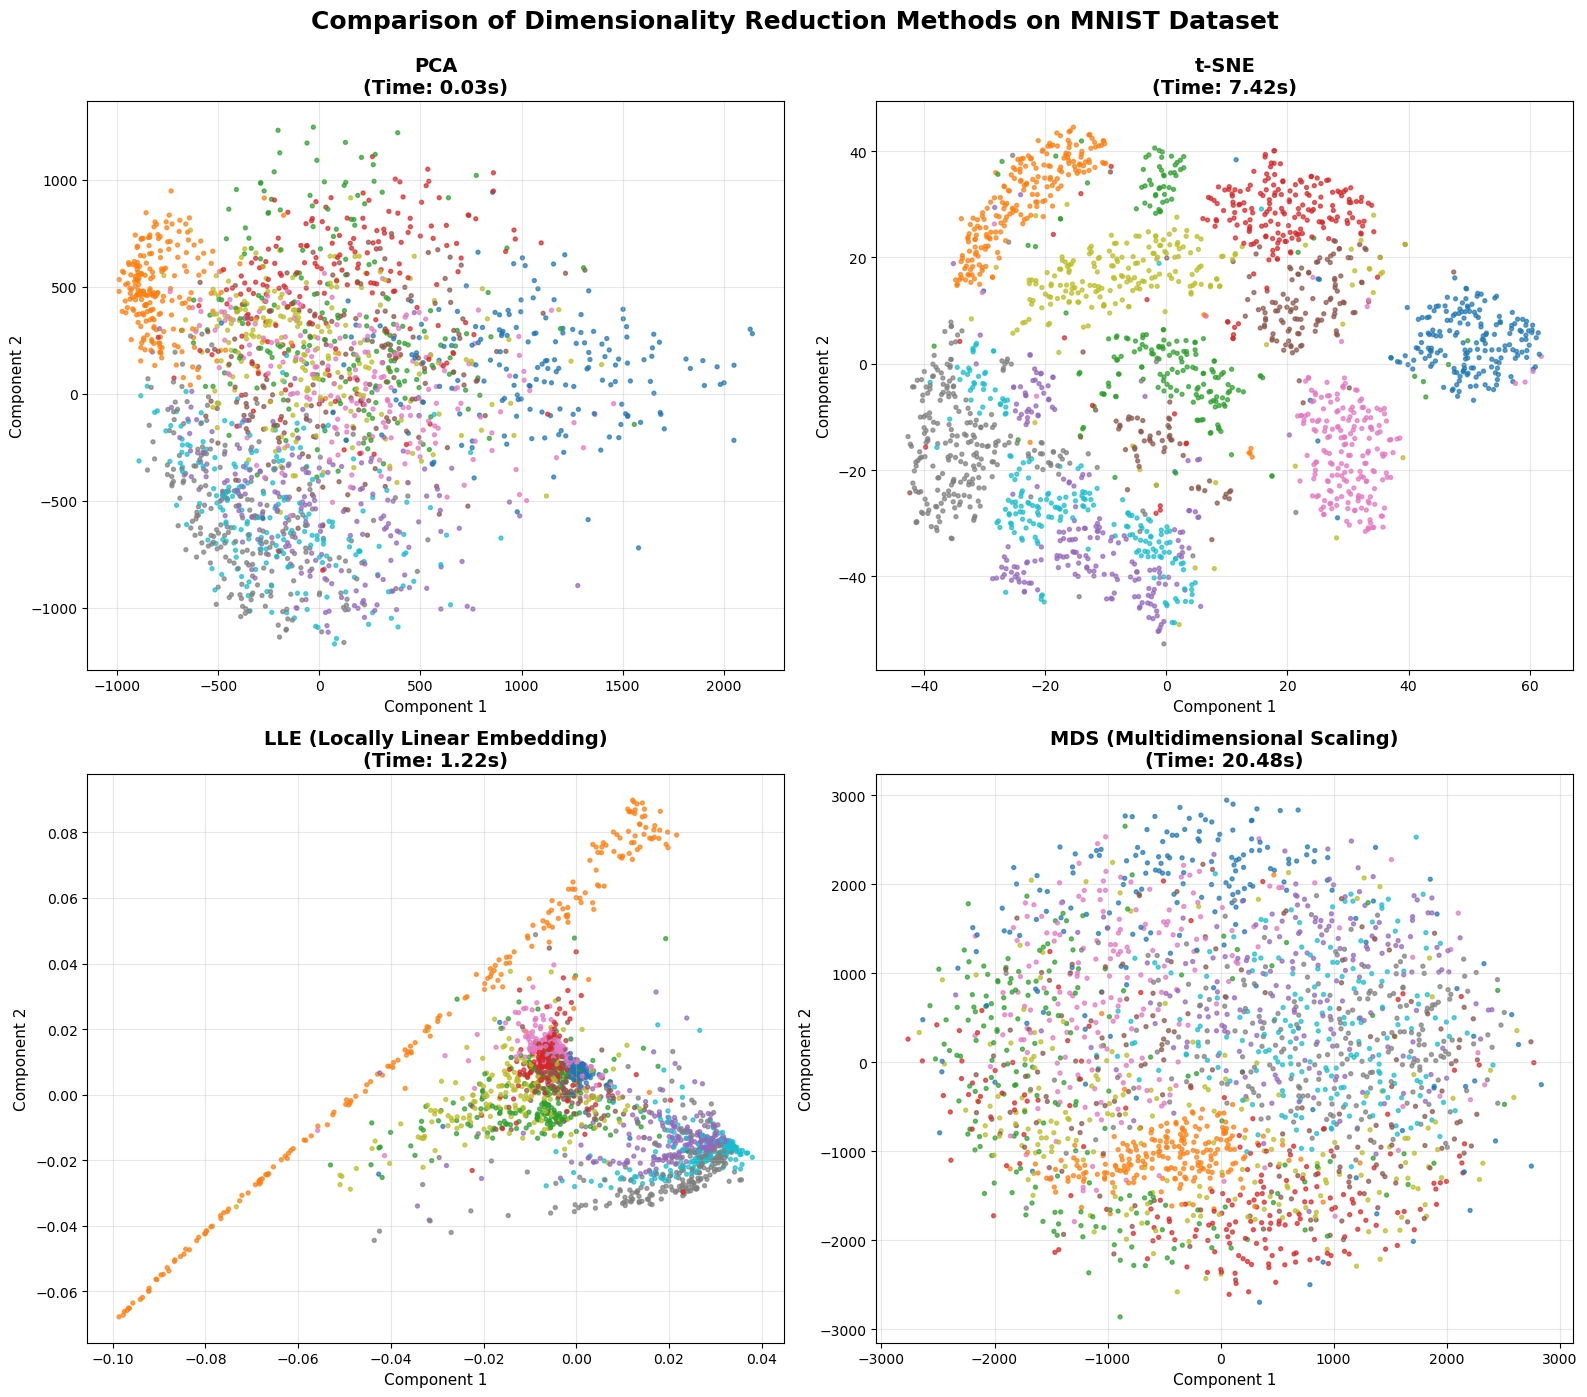

In [23]:
# ============================================================
# 5. Creating comparison visualizations
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Comparison of Dimensionality Reduction Methods on MNIST Dataset', 
             fontsize=18, fontweight='bold', y=0.995)

methods = [
    (X_pca_comp, 'PCA', pca_comp_time, axes[0, 0]),
    (X_tsne_comp, 't-SNE', tsne_comp_time, axes[0, 1]),
    (X_lle, 'LLE (Locally Linear Embedding)', lle_time, axes[1, 0]),
    (X_mds, 'MDS (Multidimensional Scaling)', mds_time, axes[1, 1])
]

for X_reduced, method_name, exec_time, ax in methods:
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], 
                        c=y_subset_comparison, 
                        cmap='tab10', 
                        s=8, 
                        alpha=0.7)
    ax.set_title(f'{method_name}\n(Time: {exec_time:.2f}s)', 
                fontsize=14, fontweight='bold')
    ax.set_xlabel('Component 1', fontsize=11)
    ax.set_ylabel('Component 2', fontsize=11)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Some conculusions from the comparison

- PCA
    - The PCA method is the fastest among the four methods, but captures a low amount of variance.
    - In addition we can observe in the plot that the digit clusters are not very well separated.

- t-SNE
    - The t-SNE method provided the best separation of digit clusters.
    - However, it is computationally expensive, taking longer than PCA and LLE.

- LLE
    - The LLE method also provided good separation of digit clusters, and was faster than t-SNE.
    - In other words, for this dataset it offers a good balance between computational efficiency and quality of the results.

- MDS 
    - MDS was the slowest method and did not provide as clear a separation of digit clusters as t-SNE or LLE.
    - Accordinging to the literature, MDS can struggle with high-dimensional data like images, which may explain its performance here.